# Importing all the pre-required modules and dependencies

In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

# Installing WordCloud 

In [5]:
pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     -------------------------------------  297.0/300.2 kB 9.0 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
from wordcloud import WordCloud
import string

# Loading DataSet

In [21]:
data = pd.read_csv('twitter_sentiment.csv')
print(data.head())
print(data.columns)

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


# Defining a Custom StopWord list for PreProcessing the DataSet

 1.Defining a function for preprocessing data

2.Converting Text to lower case for convenience

3.Now we split the tweet into words and then remove all the stopwords present in the tweet

4.After performing the above operation we again join the remaining words into tweet


5.Adding that column to the dataset which we have preprocessed now by removing stopwords from the tweet

In [22]:
# Defining a custom list of stopwords
custom_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
    'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
    'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 
    "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', 
    "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

#creating a function called preprocess_text_custom which takes input as text and preprocess the data
def preprocess_text_custom(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    return ' '.join(words)


column_names = ['ID', 'Game', 'Sentiment', 'Tweet']
data=pd.read_csv("twitter_sentiment.csv", names=column_names)
data.dropna(subset=['Tweet'], inplace=True)
data['Cleaned_Tweet'] = data['Tweet'].apply(preprocess_text_custom)

# Display the first 5 rows of the cleaned dataset
print(data.head())


     ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                     Cleaned_Tweet  
0    im getting borderlands murder  
1              coming borders kill  
2      im getting borderlands kill  
3     im coming borderlands murder  
4  im getting borderlands 2 murder  


# Plotting pie chart & bar graph for tagret variables

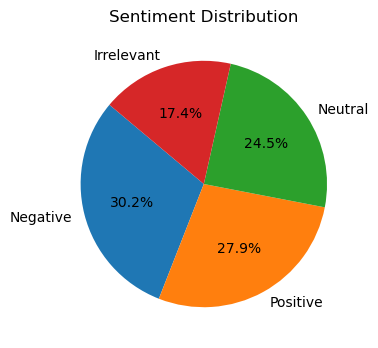

<BarContainer object of 4 artists>


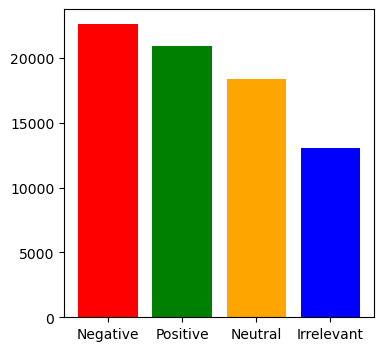

In [36]:
# Plot pie chart of sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()
plt.figure(figsize=(4,4))
print(plt.bar(sentiment_counts.index, sentiment_counts.values,color=['red','green','orange','blue']))

# Converting Textual data into matrix of TF-IDF (Term Frequency-Inverse Document Frequency)

# Converting categorical labels into numeric labels for Target values

In [ ]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Cleaned_Tweet']).toarray()

# Encode the target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])


# Splitting dataset into Training and Test Data

1.Training a Random Forest CLassifier

2.Evaluating the model performance by generating precision, recall, f1-score, and support for each class 

3.computing the confusion matrix to evaluate the accuracy of a classification

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
confusion_mat = confusion_matrix(y_test, y_pred)

print(classification_rep)
print(confusion_mat)


              precision    recall  f1-score   support

  Irrelevant       0.92      0.80      0.86      2633
    Negative       0.91      0.90      0.90      4441
     Neutral       0.89      0.86      0.88      3687
    Positive       0.82      0.92      0.87      4238

    accuracy                           0.88     14999
   macro avg       0.89      0.87      0.88     14999
weighted avg       0.88      0.88      0.88     14999

[[2099  113  126  295]
 [  60 3999  121  261]
 [  53  158 3178  298]
 [  59  148  134 3897]]


# Making Prediction on training dataset

In [15]:
# Predict the training set
y_train_pred = rf_classifier.predict(X_train)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))


Training Accuracy: 96.27%
Testing Accuracy: 87.83%


# Visualize Stopwords and Most Used Words

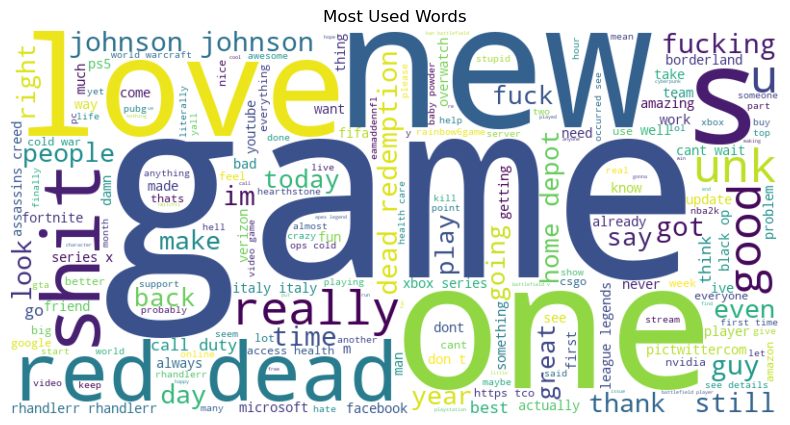

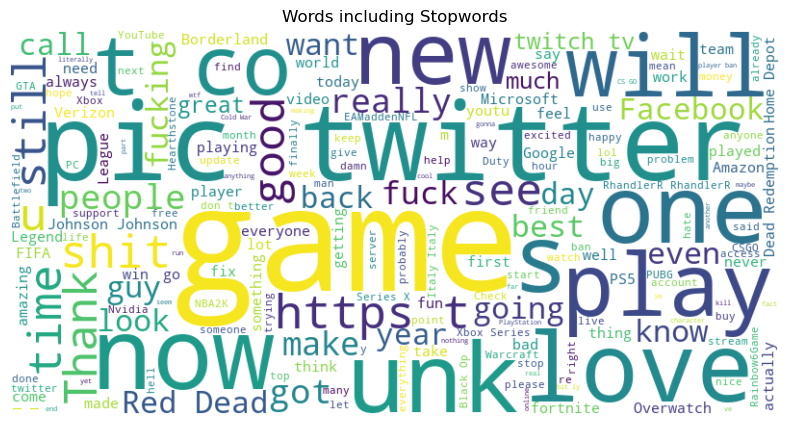

In [16]:
# Function to create a word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine all text for the word cloud
all_text = ' '.join(data['Cleaned_Tweet'])

# Plot word cloud for all text
plot_word_cloud(all_text, 'Most Used Words')

# Plot word cloud for stopwords (original text before cleaning)
all_text_original = ' '.join(data['Tweet'])
plot_word_cloud(all_text_original, 'Words including Stopwords')


# Plotting a bar graph aganist Actual and Predicted Values

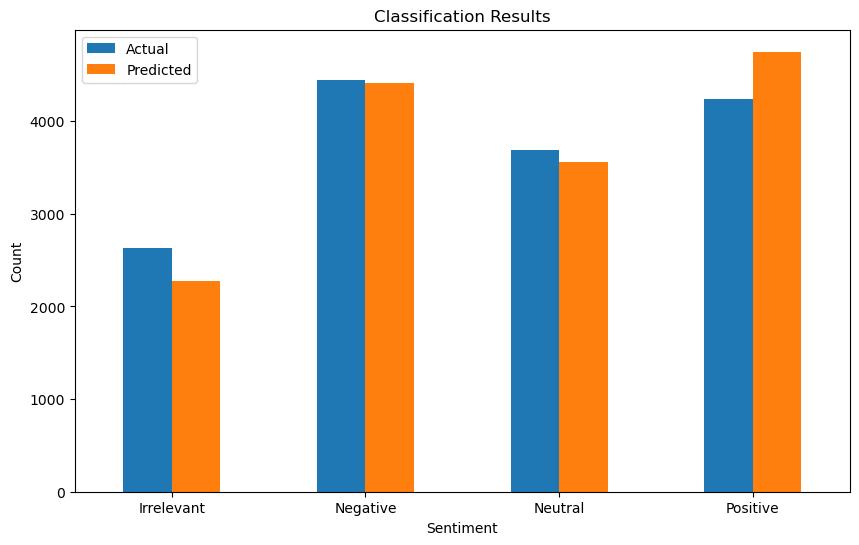

In [37]:
# Plot bar chart for classification results
import seaborn as sns

# Get the count of each class in the test set and predictions
unique, counts_test = np.unique(y_test, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

# Create a dataframe for plotting
results_df = pd.DataFrame({'Actual': counts_test, 'Predicted': counts_pred}, index=label_encoder.inverse_transform(unique))

# Plot bar chart
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
